In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading Mushrooms dataset

In [2]:
MushDF = pd.read_csv('mushrooms.csv')

In [3]:
MushDF.head(20)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [4]:
MushDF.shape

(8124, 23)

Dataset has 8124 rows and 23 columns.

In [5]:
MushDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
MushDF.nunique() #The unique categories in each column.

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [7]:
MushDF.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### This is a Classification Problem since the Target variable / Label column (Class) has Catergorical type of Data.

#### Checking for null values.

In [8]:
MushDF.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

#### There are no Null values / values missing.

In [9]:
MushDF.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

All of the data is object type.

In [10]:
MushDF['class'].unique() 

array(['p', 'e'], dtype=object)

#### There are 2 unique catergorical values in the Label column / target variable.

In [11]:
MushDF['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

####  'e' has 4208 total value count and 'p' has 3916 total value count.

### Checking for Class Imbalance.

<AxesSubplot:xlabel='class', ylabel='count'>

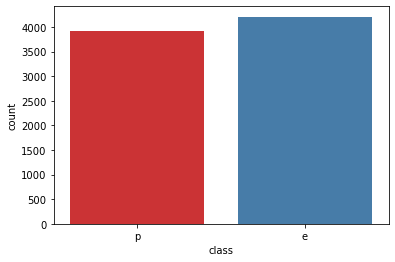

In [12]:
sns.countplot(MushDF['class'], palette="Set1")

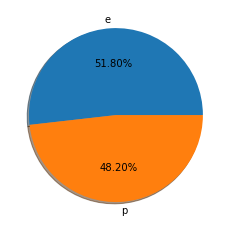

In [13]:
labels = 'e', 'p'
fig, ax = plt.subplots()
ax.pie(MushDF['class'].value_counts(),labels = labels, autopct = '%1.2f%%', shadow=True)
plt.show()

Class 'e' has 3.60% more data than Class 'p'. Therefore there isn't a substantial imbalance in data distribution between the 2 classes. There's no issue here.

### Finding Correlation 

Encoding the categorical data using Label Encoding Technique

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
labenc = LabelEncoder()

In [16]:
for col in MushDF:
    MushDF[col] = labenc.fit_transform(MushDF[col])

In [17]:
MushDF.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


All classes have been encoded using Label Encoder

In [18]:
MushDF.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

### Finding Correlation

In [19]:
m_corr = MushDF.corr()

In [20]:
m_corr.head(23)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


Dropping 'veil-type' column as it has no correlation with 

In [21]:
MushDF.drop(['veil-type'],axis=1,inplace=True)

In [22]:
MushDF.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [23]:
MushDF.shape

(8124, 22)

In [24]:
m_corr = MushDF.corr()

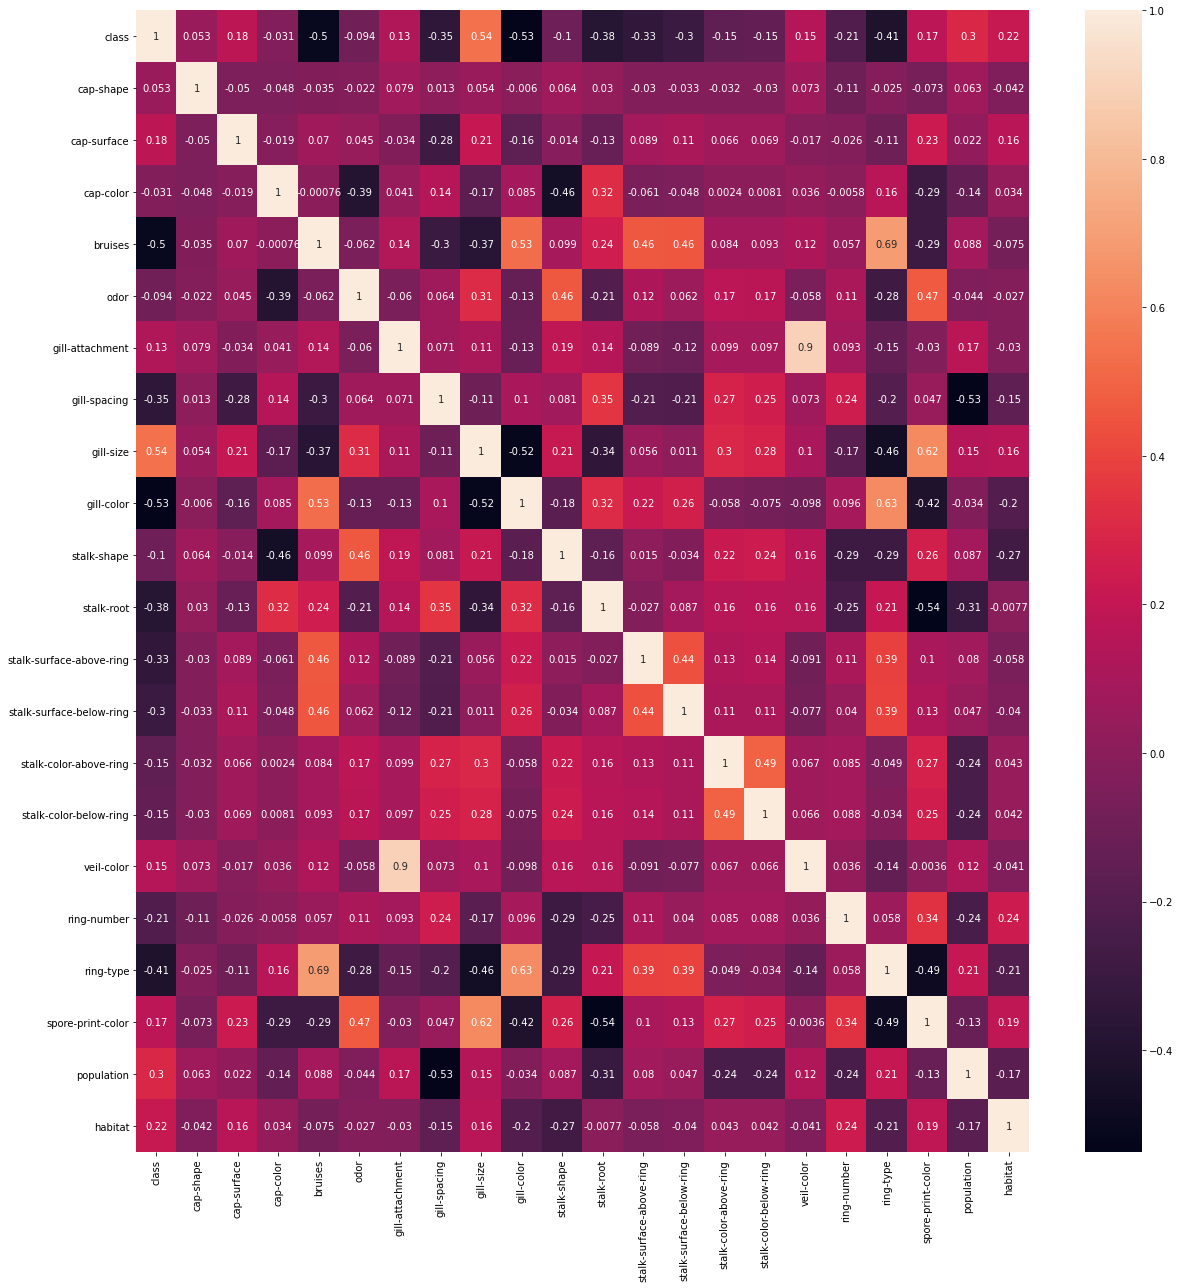

In [25]:
plt.figure(figsize=(20,21))
sns.heatmap(m_corr,annot=True)
plt.show()

### Interpreting Relationship between Dependent and Independent Classes

In [26]:
X = MushDF.drop(columns = ['class'])
y = MushDF['class']

In [27]:
y.head(10)

0    1
1    0
2    0
3    1
4    0
5    0
6    0
7    0
8    1
9    0
Name: class, dtype: int32

#### Encoding for 'e' is 0' and Encoding for 'p' is 1 .

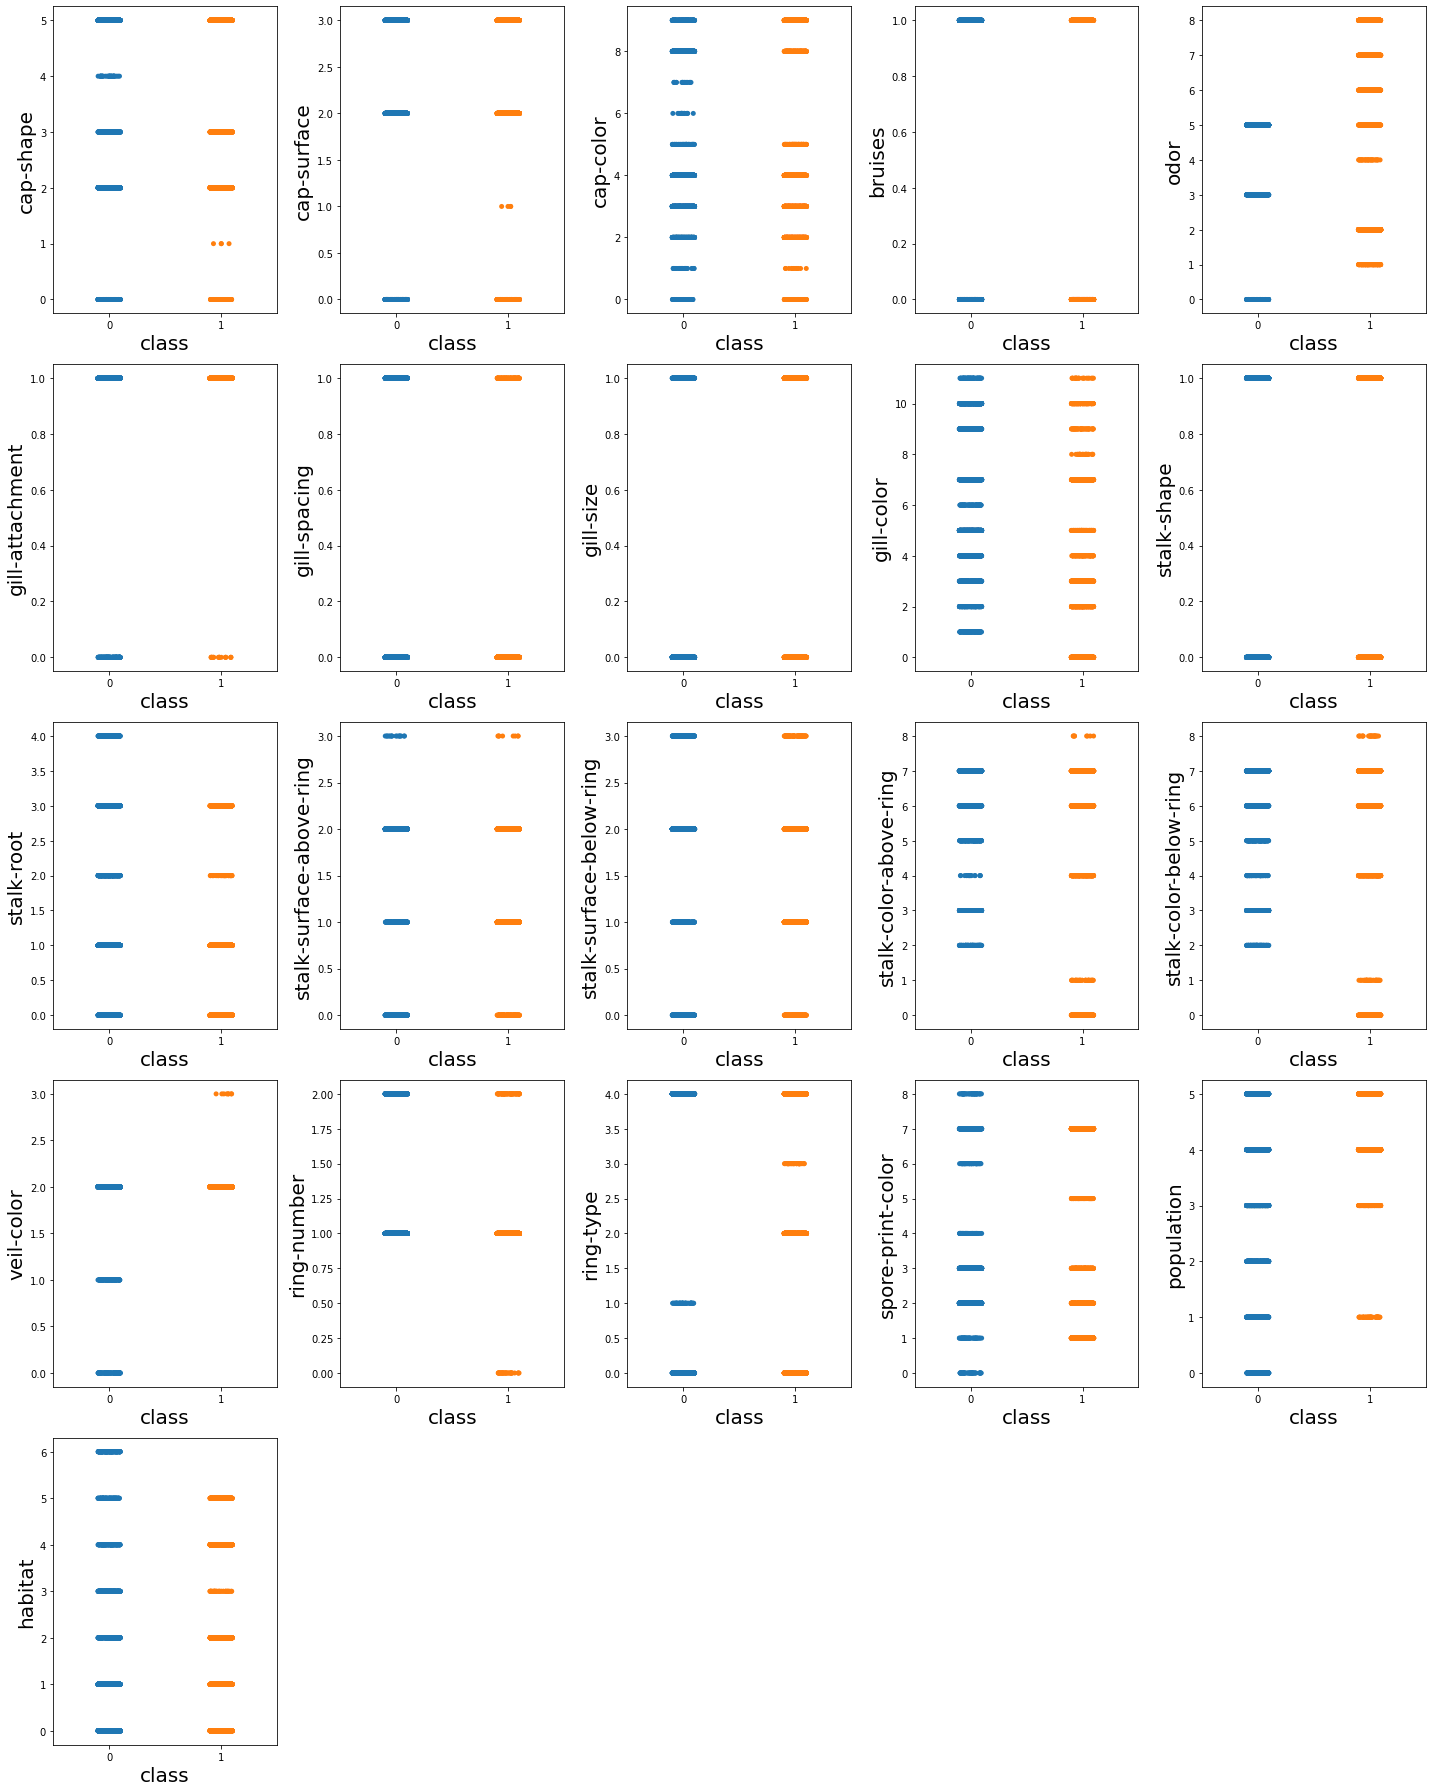

In [28]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in X:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.stripplot(y,X[col])
        plt.xlabel('class',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

Next step is to select the best features which describe the 'Class'

### Selecting KBest features

In [29]:
from sklearn.feature_selection import SelectKBest, f_classif

In [30]:
bestfeat = SelectKBest(score_func = f_classif, k = 21)
fit = bestfeat .fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [31]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(21,'Score'))

                     Feature        Score
7                  gill-size  3343.700439
8                 gill-color  3182.110596
3                    bruises  2729.510254
17                 ring-type  1658.307007
10                stalk-root  1365.373901
6               gill-spacing  1121.971924
11  stalk-surface-above-ring  1023.906250
12  stalk-surface-below-ring   796.237427
19                population   795.558777
20                   habitat   402.052460
16               ring-number   391.206696
1                cap-surface   267.136200
18         spore-print-color   247.489716
13    stalk-color-above-ring   197.297867
14    stalk-color-below-ring   178.710388
15                veil-color   174.766830
5            gill-attachment   137.887238
9                stalk-shape    85.421318
4                       odor    71.713234
0                  cap-shape    22.838203
2                  cap-color     8.008406


#### Selecting the best features based on their scores.

In [241]:
xbest = X.drop(columns = ['cap-color','cap-shape'])

In [242]:
xbest.shape

(8124, 19)

## Classification Model Building

In [243]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


#### Finding the best random state

In [244]:
from sklearn.ensemble import RandomForestClassifier
maxAcc = 0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(xbest,y,test_size = .31, random_state = i)
    modRF =  RandomForestClassifier()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 1.0 on random_state: 1


In [271]:
x_train,x_test,y_train,y_test = train_test_split(xbest,y,test_size = .30, random_state = 1)

In [272]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [273]:
from xgboost import XGBClassifier

In [274]:
from sklearn.svm import SVC

In [275]:
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
XGBC= XGBClassifier()
LOGR= LogisticRegression(solver='liblinear')
SV =  SVC()

### Training the Models

In [276]:
DTC.fit(x_train,y_train)
RFC.fit(x_train,y_train)
XGBC.fit(x_train,y_train)
SV.fit(x_train,y_train)
LOGR.fit(x_train,y_train)

[23:17:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


LogisticRegression(solver='liblinear')

All models have been trained.

### Decision Tree Classifier Model Accuracy

In [277]:
DTCpred = DTC.predict(x_test)
accu = classification_report(y_test,DTCpred)
print(accu)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1236
           1       1.00      1.00      1.00      1202

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



### Logistic Regression Model Accuracy

In [278]:
LOGRpred = LOGR.predict(x_test)
accu = classification_report(y_test,LOGRpred)
print(accu)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1236
           1       0.96      0.93      0.95      1202

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



### Random Forest Classifier Model Accuracy

In [279]:
RFCpred = RFC.predict(x_test)
accu = classification_report(y_test,RFCpred)
print(accu)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1236
           1       1.00      1.00      1.00      1202

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



### XGB Classifier Model Accuracy

In [280]:
XGBCpred = XGBC.predict(x_test)
accu = classification_report(y_test,XGBCpred)
print(accu)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1236
           1       1.00      1.00      1.00      1202

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



### SV Classifier Model Accuracy

In [281]:
SVpred = SV.predict(x_test)
accu = classification_report(y_test,SVpred)
print(accu)


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1236
           1       1.00      0.98      0.99      1202

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



### Model Cross Validation

In [306]:
from sklearn.model_selection import cross_val_score as cvs

#### Decision Tree Classifier

In [292]:
print(cvs(DTC,xbest,y,cv=5).mean())

0.9596253126184161


#### Logistic Regression

In [296]:
print(cvs(LOGR,xbest,y,cv=5).mean())

0.8410736642667678


#### Random Forest Classifier

In [299]:
print(cvs(RFC,xbest,y,cv=5).mean())

0.9027287608942782


#### XGB Classifier

In [304]:
print(cvs(XGBC,xbest,y,cv=5).mean())

[23:19:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

#### SV Classifier

In [301]:
print(cvs(SV,xbest,y,cv=5).mean())

0.8311999242137172


### On comparing Accuracy Score results with Cross Validation results, it is determined that Decision Tree Classifier is the best model.

Decision Tree Classifier Model has Accuracy score = 1 and Cross Validation Score = 0.9596

### Hyper Parameter Tuning

In [326]:
from sklearn.model_selection import GridSearchCV

In [340]:
parameter = {'max_depth': np.arange(2,500),'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"]}

In [341]:
GridCV = GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [342]:
GridCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,...
       418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430,
       431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443,
       444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456,
       457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469,
       470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482,
       483, 484, 485, 486, 487,

In [346]:
GridCV.best_params_

{'criterion': 'gini', 'max_depth': 12, 'max_features': 'log2'}

In [347]:
Best_mod = DecisionTreeClassifier(criterion = 'gini', max_depth= 12, max_features = 'log2')

In [348]:
Best_mod.fit(x_train,y_train)
pred = Best_mod.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

100.0


#### Saving The Model

In [350]:
import joblib
joblib.dump(Best_mod,"BestModelMushroom.pkl")

['BestModelMushroom.pkl']

In [352]:
mod=joblib.load("BestModelMushroom.pkl")

In [353]:
print(mod.predict(x_test))

[0 1 1 ... 1 0 1]
